In [28]:
using SerialPorts

list_serialports() # show available ports

ser = SerialPort("COM3:", 9600) 

r = readavailable(ser)

# Start a conversion
write(ser, "c")

BytesAvailable = bytesavailable(ser)

while bytesavailable(ser) < 1
    continue 
end
sleep(0.05)
r = readavailable(ser)

# Get the values
write(ser, "p") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end
a = []
i = 0
while true
    if bytesavailable(ser) < 1
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end
    if bytesavailable(ser) > 4
        b = strip(read(ser,7), ['\r','\n'])
        push!(a,parse(Int64,b))
        i += 1
    else
        read(ser,1)
    end
    
end   

print(i)
                    
close(ser)

true

ArgumentError: ArgumentError: extra characters after whitespace in "2\r\n2\r\n2"

In [20]:
receive = (3.3/65536).*a

0-element Array{Any,1}

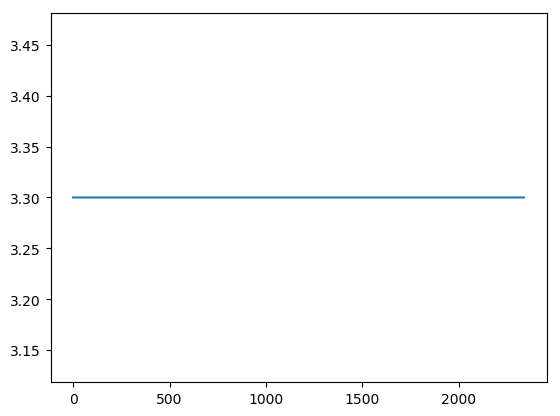

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000000F9EB70>

In [18]:
using PyPlot
figure()
plot(receive)

In [27]:
close(ser)

SerialPort("COM3:", 9600, 8, "N", 1, nothing, false, false, false, PyObject Serial<id=0xf9ecc0, open=False>(port='COM3:', baudrate=9600, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, dsrdtr=False))